# Distribuciones conjuntas y condicionadas

Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos


Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
import os

## Probabilidades conjuntas

Un par de variables aleatorias discretas (X,Y) tiene función de probabilidad conjunta definida por $f_{X,Y}=P(X=x,Y=y)$

Generamos 100 realizaciones de dos variables aleatorias X e Y, ambas binomiales de parámetro $n=1$ (Bernoulli). X definida con $p=0.2$ e Y definida con $p=0.6$. Vemos una tabla de contingencia para estas variables:

In [6]:
np.random.seed(42)
X = np.random.binomial(n=1, p=0.2, size=100)
Y = np.random.binomial(n=1, p=0.6, size=100)
pd.crosstab(X,Y, normalize=True, margins=True)

col_0,0,1,All
row_0,,,
0,0.35,0.47,0.82
1,0.06,0.12,0.18
All,0.41,0.59,1.00


Las celdas centrales constituyen las probabilidades conjuntas de las variables X e Y, tendremos entonces los siguientes casos:

$P(X=0,Y=0)=0.32$

$P(X=1,Y=0)=0.10$

$P(X=0,Y=1)=0.49$

$P(X=1,Y=1)=0.09$

Notar que las celdas que figuran en los totales son las funciones de probabilidad marginal de $f_X(x)$ y $f_Y(y)$.

In [18]:
pd.value_counts(X, normalize=True)

0    0.82
1    0.18
Name: proportion, dtype: float64

In [ ]:
pd.value_counts(Y, normalize=True)

1    0.58
0    0.42
Name: proportion, dtype: float64

## Probabilidades condicionales

La función de probabilidad condicional de $Y$ respecto a $X$ se define de la siguiente forma: $f_{Y/X}=P(Y=y/X=x)=P(X=x,Y=y)/P(X=x)$

Entonces si queremos hallar la probabildad que ocurra el suceso Y dado que ocurrió el suceso X simplimente calculamos la probabilidad conjunta de dichos suceso sobre la probabilidad del suceso X.

In [8]:
pd.crosstab(X,Y, normalize=True, margins=True)

col_0,0,1,All
row_0,,,
0,0.35,0.47,0.82
1,0.06,0.12,0.18
All,0.41,0.59,1.00


In [19]:
prob_xy = pd.crosstab(X,Y, normalize=True, margins=True)[1][1]
prob_x = pd.value_counts(X, normalize=True)[1]

prob_y_dado_x = prob_xy/prob_x
prob_y_dado_x

0.6666666666666666

## Covarianza y Correlación

La covarianza y el coeficiente de correlación son medidas que resumen el grado de asociación entre dos variables. Miden la asociación *lineal* entre estas variables. Repasamos las fórmulas muestrales para estimar estas medidas con un caso simulado de variables correlacionadas.

\

**Parámetro:** Covarianza poblacional.

$$Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]=E(XY)-\mu_X\mu_Y$$

**Estadístico:** Covarianza muestral

$$Cov(x,y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

Generamos dos variables aleatorias normales $X$ e $Y$ con medias 10 y 15, donde estas variables están correlacionadas:

In [29]:
X = 10 + np.random.normal(loc=0, scale=1, size=200)
Y = 15 + 0.6*X + np.random.normal(loc=0, scale=1, size=200)

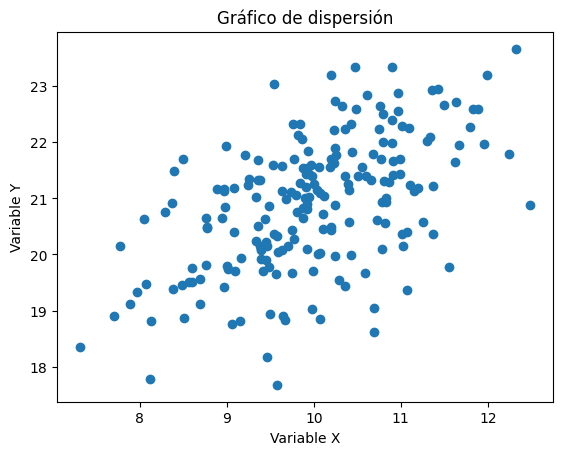

In [ ]:
plt.scatter(X,Y)
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.title('Gráfico de dispersión')
plt.show()

Calculamos la covarianza muestral con la fórmula y vemos que coincide con la función np.cov(). En esta función, el argumento ddof=1 indica el estimador insesgado de la covarianza (dividido por n-1).

In [ ]:
n = 200
cov = sum((X-X.mean())*(Y-Y.mean()))/(n-1); cov

0.6306536706729845

In [ ]:
np.cov(X,Y, ddof=1)[0,1]

0.6306536706729845

La función anterior calcula la **matriz de varianzas y covarianzas** (varianzas en la diagonal principal y covarianzas en los elementos cruzados)

In [ ]:
np.cov(X,Y, ddof=1)

array([[0.96664569, 0.63065367],
       [0.63065367, 1.40336854]])

In [ ]:
print("Varianza de X =",np.var(X, ddof=1))
print("Varianza de Y =",np.var(Y, ddof=1))

Varianza de X = 0.9666456938428959
Varianza de Y = 1.4033685365443411


La covarianza es dependiente de las unidades de medida y de la magnitud de variabilidad poblacional de cada variable. La medida que salva esta debilidad y permite hacer comparaciones entre relaciones lineales para distintos pares de variables es el *coeficiente de correlación*.

\

**Parámetro**: Coeficiente de correlación

$$Cor(X,Y)=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

**Estadístico**: Coeficiente de correlación muestral

$$Cor(x,y)=\frac{Cov(x,y)}{de(x)de(y)}$$

In [ ]:
n = 200
cov = sum((X-X.mean())*(Y-Y.mean()))/(n-1)
std_x = np.sqrt(sum((X-X.mean())**2)/(n-1))
std_y = np.sqrt(sum((Y-Y.mean())**2)/(n-1))
cor = cov/(std_x*std_y)
print("Coeficiente de correlación =",cor)

Coeficiente de correlación = 0.5414662598804196


In [ ]:
np.corrcoef(X,Y)[0,1]

0.5414662598804196

La función anterior calcula la **matriz de correlaciones** (varianzas normalizadas a 1 en la diagonal principal y correlaciones en elementos los cruzados que muestran correlaciones de a pares de variables)

In [ ]:
np.corrcoef(X,Y)

array([[1.        , 0.54146626],
       [0.54146626, 1.        ]])

## Distribución conjunta

Para construir una distribucion normal conjunta necesitamos definir medias y la matriz de covarianzas de nuestras dos variables X e Y.

In [34]:
mean = [0, 0]
cov = [[1, 0.6], [0.6, 1]]

Luego creamos una grilla sobre la cual calcuaremos la probabilidades.

* **meshgrid** crea una grilla 2D creando una combinación de cada x con Y.
* **dstack** combina lo anterior para darle forma de un array de 3D que nos permite obtener luego la función de probabilidad conjunta

Ejemplo sencillo.

In [65]:
x = np.linspace(1, 3, 3)
y = np.linspace(4, 7, 3)

X, Y = np.meshgrid(x, y)

array([1., 2., 3.])

In [63]:
Z = np.dstack((X, Y))
Z

array([[[1. , 4. ],
        [2. , 4. ],
        [3. , 4. ]],

       [[1. , 5.5],
        [2. , 5.5],
        [3. , 5.5]],

       [[1. , 7. ],
        [2. , 7. ],
        [3. , 7. ]]])

In [35]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

Ahora definimos una función de distribución normal y aplicamos sobre los puntos antes definidos.

In [45]:
rv = stats.multivariate_normal(mean, cov)
Z = rv.pdf(pos)

Por último graficamos.

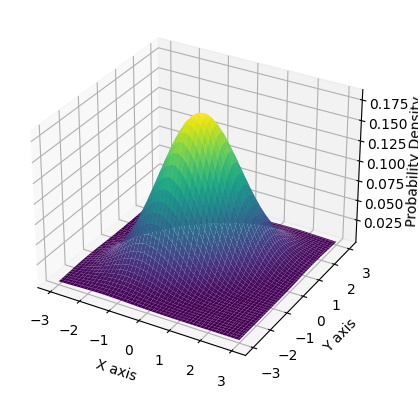

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densidad')

plt.show()

## Distribución condicional - Aplicación práctica

Realizamos la conexión con Drive primero o en caso de que usen otro entorno seteamos la dirección en la que se encuentren las bases.

In [68]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la tabla
%cd "drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2"

Mounted at /content/drive
/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Descomentar los siguiente y cambiar el path si van a trabajar de forma local.

In [69]:
#os.chdir("h:/Mi unidad/Diplomatura Ciencia de Datos - FaCENA (No compartir)")

Cargamos la base de la EPH.

In [89]:
datos = pd.read_table("Bases/usu_individual_T323.txt", sep=";", decimal=",")
datos.head()

<ipython-input-89-b035e50a0c7f>:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_table("Bases/usu_individual_T323.txt", sep=";", decimal=",")


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPSSHJOKSCDEFOCD00804371,2023,3,1,5,1,41,N,8,341,...,2.0,4,24000.0,1,1.0,1,NaN,1.0,1,418
1,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,1,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
2,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,3,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
3,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,2,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
4,TQRMNOSQQHMMKUCDEIMBF00813017,2023,3,1,1,1,43,N,36,143,...,4.0,5,50000.0,2,2.0,2,NaN,2.0,2,168


Creamos una variable binaria de informalidad.

In [91]:
datos['informalidad'] = (datos['PP07H'] - 1)

Hago un primer filtro para eliminar algunos valores extremos y que se vea mejor el gráfico.

In [103]:
datos_filtro = datos[(datos.informalidad>=0) & (datos.IPCF<1000000)]

Ahora graficamos de forma supuerpuesta la distribución de ingresos según si es informal o formal

<ipython-input-104-19ad572ec83e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(datos_filtro[datos.informalidad==0]['IPCF'],weights=datos_filtro[datos.informalidad==0]['PONDIH'], bins=30, alpha=0.25, label='Formal')
<ipython-input-104-19ad572ec83e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(datos_filtro[datos.informalidad==0]['IPCF'],weights=datos_filtro[datos.informalidad==0]['PONDIH'], bins=30, alpha=0.25, label='Formal')


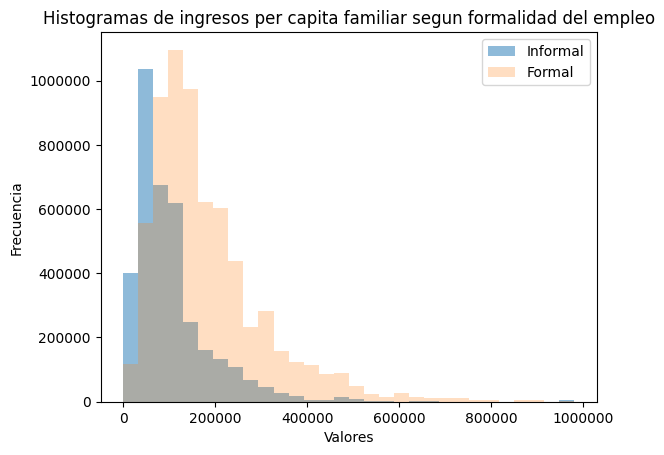

In [104]:
plt.hist(datos_filtro[datos_filtro.informalidad==1]['IPCF'],weights=datos_filtro[datos_filtro.informalidad==1]['PONDIH'], bins=30, alpha=0.5, label='Informal')
plt.hist(datos_filtro[datos.informalidad==0]['IPCF'],weights=datos_filtro[datos.informalidad==0]['PONDIH'], bins=30, alpha=0.25, label='Formal')
plt.legend(loc='upper right')
plt.title('Histogramas de ingresos per capita familiar segun formalidad del empleo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain')
plt.show()